In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [120]:
data = pd.read_csv ("weatherHistory.csv")
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [121]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['day'] = data['Formatted Date'].dt.dayofyear
data.head(2)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,day
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90


In [122]:
data['MY_Date'] = data['Formatted Date'].map(lambda date : date.year)
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,day,MY_Date
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91,2006


In [123]:
data01 = data.groupby(['MY_Date' , 'day'])['Temperature (C)'].mean().reset_index()
data01

,MY_Date,day,Temperature (C)
0,2005,365,0.577778
1,2006,1,4.075000
2,2006,2,5.263194
3,2006,3,2.340509
4,2006,4,2.251852
...,...,...,...
4014,2016,362,0.278009
4015,2016,363,0.222222
4016,2016,364,0.167824
4017,2016,365,0.117593


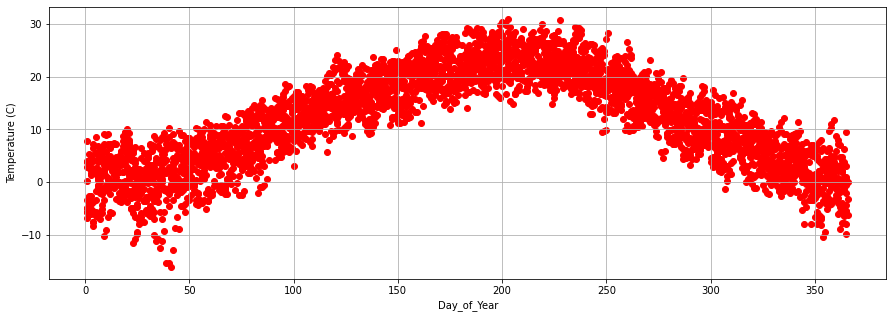

In [124]:
plt.figure(figsize=(15,5)) 
plt.scatter(data01['day'], data01['Temperature (C)'], marker='o' , c = 'red')
plt.grid()

plt.ylabel('Temperature (C)')
plt.xlabel('Day_of_Year')

plt.savefig('w.jpeg')

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split( data01['day'].to_numpy(), data01['Temperature (C)'].to_numpy() , test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3215,) (804,) (3215,) (804,)


In [126]:

class perceptron:
    def __init__ (self):
        pass

    def fit(self, X, Y  , epochs):

        lr = 0.000001
        self.w = np.random.rand(1)
        self.b = np.random.rand(1)
        self.Error = []
        for i in range (epochs):
            for i in range (X.shape[0]):
                y_pred = np.matmul(X[i].reshape(1,-1), self.w ) + self.b
                e = Y[i] - y_pred
                self.w += lr * X[i] * e
                self.b += lr * e 

                Y_pred = np.matmul(X.reshape(-1,1), self.w) + self.b
                error = np.mean(np.abs(Y - Y_pred))
                self.Error.append(error)
        
        np.save('w', self.w)
        np.save('b', self.b)
        return self.Error


    def predict (self, X):
        w = np.load('w.npy')
        b = np.load('b.npy')

        Y_pred=np.matmul(X.reshape(-1,1), w) + b
        print('The prediction is -----> ', Y_pred)

        return  Y_pred

    def evaluate(self, X, Y):
        w = np.load('w.npy')
        b = np.load('b.npy')

        Y_pred = np.matmul(X.reshape(-1,1), w) + b
        evaluation = np.mean(np.abs(Y - Y_pred))
        print('The evaluation is ---->', evaluation )
        
        return evaluation

In [127]:
model = perceptron()
model.fit(X_train, Y_train ,2)
model.predict(X_train)
model.evaluate(X_train, Y_train)

The prediction is ----->  [ 7.31774441  1.80221538  7.89598536 ...  7.4956647  17.05888036
  5.98334223]
The evaluation is ----> 8.23490966577237


8.23490966577237

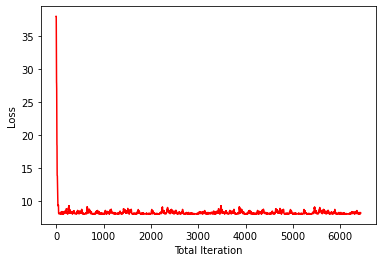

In [130]:
plt.plot((np.arange(len(model.Error))), model.Error, c = 'red')
plt.ylabel('Loss')
plt.xlabel('Total Iteration')
plt.show()

Text(0, 0.5, 'Temperature (C)')

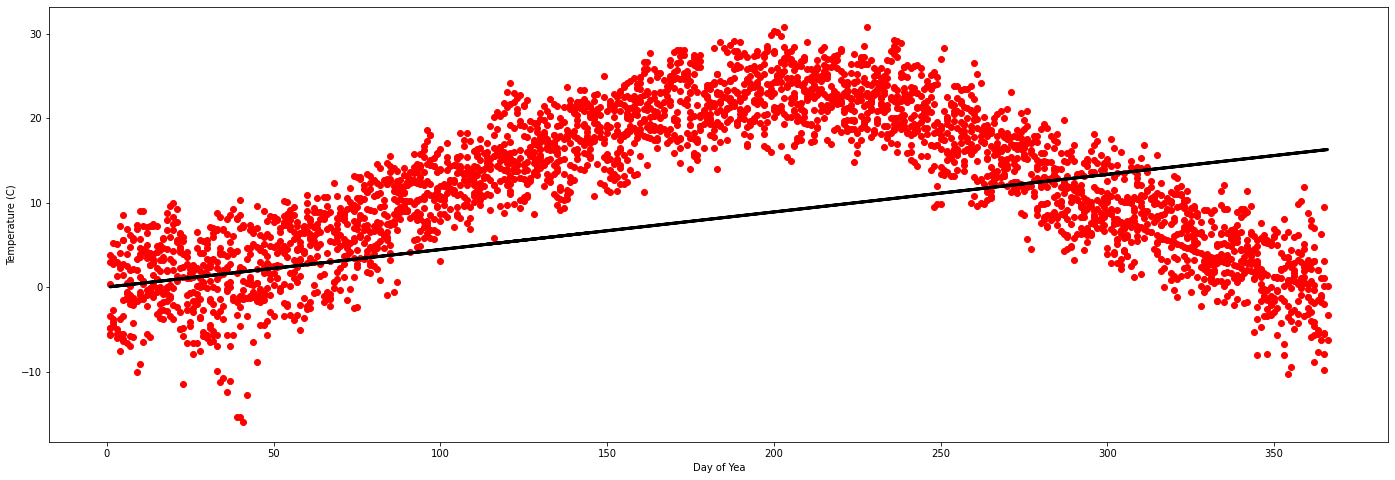

In [129]:
X_train = X_train.reshape(-1,1)
y_pred = np.matmul(X_train, model.w)

plt.figure(figsize = (24, 8))
plt.scatter(X_train, Y_train, c='red')
plt.plot(X_train, y_pred, c='black', lw=3)
plt.xlabel('Day of Yea')
plt.ylabel('Temperature (C)')